In [24]:
import pandas as pd
from src.data import *
from src.portfolio import *
from src.efficient_frontier import *
from src.plot import *
import yfinance as yf
from scipy.optimize import Bounds, LinearConstraint
from pypfopt.expected_returns import mean_historical_return

In [25]:
esg_data = esg_score_weight(pd.read_excel('data/ESG_DATA.xlsx'), np.array([1/3,1/3,1/3]), 1200.0)
full_data = stock_monthly_close(esg_data, dates=('2003-01-01','2023-01-01'))
prices, esg = seperate_full_data(full_data)
#prices = currency_rates(prices)
#prices = pd.read_csv('data/PRICES.csv')

In [26]:
esg_data

,Isin,CurrencyCode,company_name,environment_grade,environment_level,environment_score,governance_grade,governance_level,governance_score,social_grade,social_level,social_score,stock_symbol,total,total_grade,total_level,weighted_score
0,SE0011337708,SEK,AAK AB (publ.),AA,Excellent,647,BB,Medium,345,BB,Medium,307,AAK.ST,1299,A,High,1299.0
21,SE0000862997,SEK,BillerudKorsnäs AB (publ),A,High,550,BB,Medium,345,BB,Medium,305,BILL.ST,1200,A,High,1200.0
45,SE0005468717,SEK,Fnm.,A,High,566,BB,Medium,335,BB,Medium,362,FNM.ST,1263,A,High,1263.0
127,NO0010307135,NOK,Abbott Laboratories,A,High,520,BB,Medium,354,BB,Medium,355,ABT.OL,1229,A,High,1229.0
155,NO0011002586,NOK,Elmo Software Limited,A,High,560,BB,Medium,340,BB,Medium,304,ELO.OL,1204,A,High,1204.0
191,NO0010629108,NOK,NextSource Materials Inc.,AA,Excellent,600,BB,Medium,315,BB,Medium,327,NEXT.OL,1242,A,High,1242.0
210,NO0010840507,NOK,Pexip Holding ASA,A,High,570,BB,Medium,340,BB,Medium,303,PEXIP.OL,1213,A,High,1213.0
230,KYG236271055,NOK,"Shelf Drilling, Ltd.",A,High,595,BB,Medium,380,BB,Medium,303,SHLF.OL,1278,A,High,1278.0
243,NO0010708068,NOK,VOW ASA,A,High,575,BB,Medium,338,BB,Medium,364,VOW.OL,1277,A,High,1277.0
252,DK0010263722,DKK,AGF Management Limited,AA,Excellent,700,BB,Medium,350,BB,Medium,373,AGF-B.CO,1423,A,High,1423.0


In [27]:
prices = filter_prices(prices, 0, 230)
returns_pct_change = pct_returns_from_prices(prices)

In [28]:
prices

,BILL.ST,AGF-B.CO,RTX.CO
Date,,,
2003-01-01,53.230415,3.575149,72.000000
2003-02-01,56.930927,2.809045,73.000000
2003-03-01,58.354198,2.553678,66.000000
2003-04-01,61.770058,2.553678,67.500000
2003-05-01,54.938343,2.042942,77.000000
...,...,...,...
2022-08-01,139.149994,0.618000,144.199997
2022-09-01,131.399994,0.520000,115.000000
2022-10-01,142.600006,0.504000,127.199997


In [29]:
rolling_window_expected_return(returns_pct_change)

,BILL.ST,AGF-B.CO,RTX.CO
2013-01-01,0.124915,0.065637,-0.055642
2014-01-01,0.125615,0.040915,0.085801
2015-01-01,0.169342,-0.025271,0.127356
2016-01-01,0.189244,-0.089100,0.074122
2017-01-01,0.181011,-0.164764,0.171488
2018-01-01,0.229053,-0.236269,0.251546
2019-01-01,0.327213,-0.164731,0.348493
2020-01-01,0.145762,-0.043016,0.419641
2021-01-01,0.139075,0.030062,0.334620
2022-01-01,0.143905,0.079865,0.322735


In [48]:
parameters1 = rolling_window_efficient_frontier(returns_pct_change)

c:\Users\toros\OneDrive\Dokumenter\GitHub\BachelorThesis\src\efficient_frontier.py:39: OptimizeWarning: Unknown solver options: xtol, gtol, barrier_tol
  result = minimize(function,
c:\Users\toros\OneDrive\Dokumenter\GitHub\BachelorThesis\src\efficient_frontier.py:55: OptimizeWarning: Unknown solver options: xtol, gtol, barrier_tol
  result = minimize(function,


Min. Risk = 36.851% => Return: 3.721%  Sharpe Ratio = 0.10
Max. Sharpe Ratio = 0.30 => Return: 33.18%  Risk: 110.026%
Min. Risk = 36.821% => Return: 9.331%  Sharpe Ratio = 0.25
Max. Sharpe Ratio = 0.28 => Return: 10.99%  Risk: 39.958%
Min. Risk = 35.595% => Return: 10.587%  Sharpe Ratio = 0.30
Max. Sharpe Ratio = 0.39 => Return: 18.29%  Risk: 46.800%
Min. Risk = 35.242% => Return: 6.978%  Sharpe Ratio = 0.20
Max. Sharpe Ratio = 0.42 => Return: 32.06%  Risk: 75.583%
Min. Risk = 34.419% => Return: 7.260%  Sharpe Ratio = 0.21
Max. Sharpe Ratio = 0.61 => Return: 61.40%  Risk: 100.142%
Min. Risk = 32.893% => Return: 6.657%  Sharpe Ratio = 0.20
Max. Sharpe Ratio = 0.90 => Return: 119.53%  Risk: 132.366%
Min. Risk = 30.698% => Return: 17.189%  Sharpe Ratio = 0.56
Max. Sharpe Ratio = 1.10 => Return: 66.87%  Risk: 60.600%
Min. Risk = 23.041% => Return: 14.249%  Sharpe Ratio = 0.62
Max. Sharpe Ratio = 1.03 => Return: 39.21%  Risk: 38.229%
Min. Risk = 21.336% => Return: 17.622%  Sharpe Ratio = 0.

In [50]:
len(parameters1)

11

In [53]:
weight_array = []
port_return_array = []

for i in range(len(parameters1)):
    weight_array.append(parameters1[i][6])

#for i in range(len(weight_array)):
 #   port_return_array.append()

weight_array


[array([ 1.97171356,  0.25892482, -1.23063838]),
 array([0.63833663, 0.02955053, 0.33211284]),
 array([ 0.72802988, -0.16342812,  0.43539823]),
 array([ 1.28357005, -0.60491541,  0.32134536]),
 array([ 1.1376631, -1.2839143,  1.1462512]),
 array([ 1.4188769, -2.       ,  1.5811231]),
 array([ 0.8360217, -0.6586122,  0.8225905]),
 array([ 0.41970023, -0.1888622 ,  0.76916197]),
 array([ 0.38708186, -0.09388036,  0.7067985 ]),
 array([0.41194516, 0.00962161, 0.57843324]),
 array([0.2767306 , 0.05766415, 0.66560525])]

In [80]:
print(returns_pct_change)
print(returns_pct_change.resample('Y').mean().to_numpy()[0])
print(weight_array[0])
print(returns_pct_change.resample('Y').mean().to_numpy()[10+len(weight_array)-2]*weight_array[10])
len(weight_array)


             BILL.ST  AGF-B.CO    RTX.CO
Date                                    
2003-02-01  0.069519 -0.214286  0.013889
2003-03-01  0.025000 -0.090909 -0.095890
2003-04-01  0.058537  0.000000  0.022727
2003-05-01 -0.110599 -0.200000  0.140741
2003-06-01 -0.031088 -0.125000 -0.090909
...              ...       ...       ...
2022-08-01  0.065875  0.166038 -0.144721
2022-09-01 -0.055695 -0.158576 -0.202497
2022-10-01  0.085236 -0.030769  0.106087
2022-11-01  0.030505  0.083333  0.080189
2022-12-01 -0.135080  0.021978 -0.142649

[239 rows x 3 columns]
[ 0.01594305 -0.01735467 -0.03879273]
[ 1.97171356  0.25892482 -1.23063838]
[-0.00547618  0.0003379  -0.02277101]


11

In [75]:
year_pct_change = returns_pct_change.resample('Y').mean().to_numpy()

for i in range(len(weight_array)):
    print(i)
    port_return_array.append(year_pct_change[i+len(weight_array)-2]*weight_array[i])

port_return_array


0
1
2
3
4
5
6
7
8
9
10


[array([ 0.05620611, -0.00162916, -0.08690756]),
 array([ 0.02073768, -0.00019491,  0.01227865]),
 array([ 0.00016562, -0.00092109,  0.02241821]),
 array([-0.00846336,  0.00565842,  0.00340246]),
 array([-0.02233284, -0.03491593,  0.01005168]),
 array([ 0.00892411, -0.06959869,  0.01818267]),
 array([ 0.02103988, -0.04203068,  0.02221198]),
 array([ 0.00648527,  0.00303699, -0.00728962]),
 array([-0.0076599 , -0.00055012, -0.02418027]),
 array([ 0.05059201, -0.00771403, -0.10294345]),
 array([ 0.01819657, -0.00018593,  0.02345377]),
 array([0.02365155, 0.00107794, 0.01609725]),
 array([ 0.00029201, -0.00340932,  0.01654574]),
 array([-0.0075013 ,  0.01200982,  0.01213669]),
 array([-0.0278532 , -0.05438982,  0.01386515]),
 array([ 0.00525821, -0.02291927,  0.00945966]),
 array([ 0.01056246, -0.01205263,  0.02076928]),
 array([ 0.00598124,  0.00150964, -0.00669858]),
 array([-8.15191762e-03,  5.63802050e-05, -1.97887690e-02]),
 array([ 0.03143513, -0.00449355,  0.04773982]),
 array([0.0

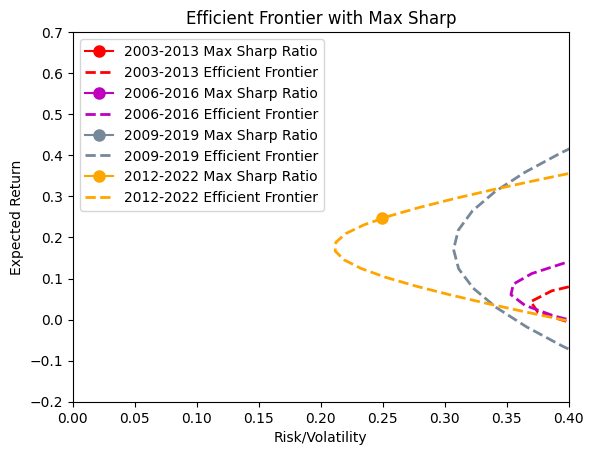

In [47]:
plot_efficient_frontier(parameters1)

In [ ]:
parameters = []
for i in range(0, 11):
  #r_opt_set = set()
  print(f"-------------------------- 20{3+i:02d}-20{13+i:02d} --------------------------")

  # define the rolling window
  sample_rolling_window = returns_pct_change[i*12:i*12+(12*10)]

  ret_port = mean_return_annual(sample_rolling_window)

  cov_port = covariance_matrix_annual(sample_rolling_window)

  parameters.append(calculate_efficient_frontier(ret_port, cov_port))


In [ ]:
#mpl.style.use('classic')
mpl.style.use('default')

fig, ax = plt.subplots()
plt.title('Efficient Frontier with Max Sharp Ratio', fontsize=12)
plt.xlabel('Risk/Volatility')
plt.ylabel('Return')
colors = ['r','b','k','m','g','c', 'lightslategrey', "darkcyan", "purple", "orange", "olive"]
for i, x in enumerate(parameters):
  opt_sr_vol, opt_sr_ret, opt_risk_vol,  opt_risk_ret, frontier_x, frontier_y, _ = x
  #ax.plot(opt_sr_vol, opt_sr_ret,'*', markersize=20, label=f'20{3+i:02d}-20{13+i:02d} Max Sharpe') # red star
  plt.plot(opt_sr_vol,  opt_sr_ret, marker='o', color = f'{colors[i]}', markersize=8, label=f'20{3+i:02d}-20{13+i:02d} Max Sharp Ratio') # red dot
  plt.plot(frontier_x, frontier_y, linestyle='--', color = f'{colors[i]}', linewidth=2, label=f'20{3+i:02d}-20{13+i:02d} Efficient Frontier') # red dashed line
  
  #ax.scatter(x[2], x[1], marker="*", s=100, label=f"20{3+i:02d}-20{13+i:02d} Max Sharpe")
plt.xlim([0.0,0.4])
plt.ylim([-0.2,1])
plt.legend(bbox_to_anchor =(0.5, 0.9, 1, 0), ncol = 1, fontsize="small")
#fig_path = os.path.join(PLOTS_PATH, f"efficient_frontier.png")
#plt.savefig(fig_path, dpi=150,bbox_inches="tight")
plt.show()

In [ ]:
#mpl.style.use('classic')
mpl.style.use('default')

fig, ax = plt.subplots()
plt.title('Efficient Frontier with Minimum Risk/Risk Aversion', fontsize=12)
plt.xlabel('Risk/Volatility')
plt.ylabel('Return')
colors = ['r','b','k','m','g','c', 'lightslategrey', "darkcyan", "purple", "orange", "olive"]
for i, x in enumerate(parameters):
  opt_sr_vol, opt_sr_ret, opt_risk_vol,  opt_risk_ret, frontier_x, frontier_y, _ = x
  #ax.plot(opt_sr_vol, opt_sr_ret,'*', markersize=20, label=f'20{3+i:02d}-20{13+i:02d} Max Sharpe') # red star
  plt.plot(opt_risk_vol,  opt_risk_ret, marker='o', color = f'{colors[i]}', markersize=8, label=f'20{3+i:02d}-20{13+i:02d} Minimum Risk') # red dot
  plt.plot(frontier_x, frontier_y, linestyle='--', color = f'{colors[i]}', linewidth=2, label=f'20{3+i:02d}-20{13+i:02d} Efficient Frontier') # red dashed line
  
  #ax.scatter(x[2], x[1], marker="*", s=100, label=f"20{3+i:02d}-20{13+i:02d} Max Sharpe")
plt.xlim([0.03,0.1])
plt.ylim([-0.1,0.4])
plt.legend(bbox_to_anchor =(0.5, 0.9, 1, 0), ncol = 1, fontsize="small")
#fig_path = os.path.join(PLOTS_PATH, f"efficient_frontier.png")
#plt.savefig(fig_path, dpi=150,bbox_inches="tight")
plt.show()

In [ ]:
portfolio_mean(df)

In [ ]:
cov = portfolio_covariance(df)
portfolio_std(cov, w)

In [ ]:
portfolio_sharp_ratio(df, w, cov)

In [ ]:
#bounds = Bounds(-2, 5)

#Create x0, the first guess at the values of each asset's weight.
#w0 = np.linspace(start=1, stop=0, num=cov.shape[1])
#x0 = w0/np.sum(w0)
# All weights between 0 and 1
# # The second boundary is the sum of weights.
#linear_constraint = LinearConstraint(np.ones((cov.shape[1],), dtype=int),1,1)
#options = {'xtol': 1e-07, 'gtol': 1e-07, 'barrier_tol': 1e-07, 'maxiter': 1000}
 

In [ ]:
def portfolio_minimize_risk(port_return, 
                                port_covariance, 
                                esg_data, 
                                x0,
                                linear_constraint, 
                                bounds, 
                                options = None):
    """
    Function that will take different inputs including esg score data and compute the minimum risk of different portfolios 
    :param: A dataframe of the portfolio covariance matrix
    :param: A dataframe of esg scores of the different assets in portfolio
    :param: x0 argument that is the initial guess for the minimizer
    :param: Linear constraints for the minimizer
    :param: Bounds for the minimizer
    :param: 
    :param: Options for the minimizer
    :returns: A dataframe containing portfolio weight choice for minimizing portfolio risk using esg scores
    """
    
    results = {'esg':[],
               'weights':[],
               'risk':[],
               'return':[]}
    
    function = lambda weight: portfolio_std(port_cov=port_covariance, weights=weight)
    constraint_esg = {'type': 'eq', 'fun': lambda weight: np.dot(weight, esg_data)}
    result = minimize(function, 
                      x0, 
                      method='trust-constr', 
                      bounds=bounds, 
                      constraints=[linear_constraint, constraint_esg], 
                      options=options)
   
    optimal_weights = list(result['x'])
    print(optimal_weights)
    optimal_esg = np.dot(optimal_weights, esg_data)
    results['esg'].append(optimal_esg)
    results['weights'].append(optimal_weights)
    results['risk'].append(result['fun'])
    results['return'].append(np.dot(optimal_weights, port_return.sum()))

    return results


In [ ]:
# set the window size
#window_size = 2

# make different lists to append data in every window
#expected_return = []
#expected_year = []

#def simple_return(beginning_price, end_price):
#  return ((end_price-beginning_price)/beginning_price)

#def annual_return(simple_return, years_held):
#  return (((simple_return+1)**(1/years_held))-1)

# setup af loop to iterate through window and make calculations
#for i in range(0, 6):

  # define the rolling window
#  sample_rolling_window = df[i*12:i*12+(12*window_size)]

  # calculate the expected return as a dataframe
#  window_monthly_returns = pd.DataFrame()
#  window_monthly_returns = sample_rolling_window
#  simple_window_yearly_returns_mean = simple_return(window_monthly_returns.iloc[0], window_monthly_returns.iloc[-1])
#  annual_window_return = annual_return(simple_window_yearly_returns_mean, window_size)

  # append the results of expected return and the years to list
#  expected_return.append(annual_window_return)

# make list of expected return into a dataframe
#for x in range(2013, 2024):
#  expected_year.append(dt(x,1,1))
  
#expected_return = pd.DataFrame(expected_return, index=expected_year)

#expected_return


In [ ]:
#esg_data = pd.read_excel('ESG_DATA.XLS')
#for index, row in esg_data.iterrows():
    # stockholm exchange
    if row['Isin'].startswith('SE'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.ST'
    
    # swiss exchange
    elif row['Isin'].startswith('CH0242214887'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.ST'
    elif row['Isin'].startswith('CH1122548808'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.OL'
    elif row['Isin'].startswith('CH'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.SW'
    
    # toroto exchange
    elif row['Isin'].startswith('CA98936C1068'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.L'
    elif row['Isin'].startswith('CA'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.TO'
    elif row['Isin'].startswith('GB'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.L'
    
    # paris exchange
    elif row['Isin'].startswith('FR'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.PA'

    # copenhagen exchange
    
    elif row['Isin'].startswith('DK0060668796'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.ST'
    elif row['Isin'].startswith('DK0060520450'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.OL'
    elif row['Isin'].startswith('FI4000297767'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.CO' 
    elif row['Isin'].startswith('DK'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.CO'

    # oslo exchange
    elif row['Isin'].startswith('NO'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.OL'
    elif row['Isin'].startswith('KYG'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.OL' 
    elif row['Isin'].startswith('CY'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.OL'
    elif row['Isin'].startswith('BMG'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.OL'
    elif row['Isin'].startswith('MHY'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.SG'
    elif row['Isin'].startswith('US36467X2062'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.OL'
    elif row['Isin'].startswith('SGX'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.OL'
    elif row['Isin'].startswith('FO0000000179'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.OL'

    elif row['Isin'].startswith('MT0000580101'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.DE'
    elif row['Isin'].startswith('MT0001390104'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.ST'
    elif row['Isin'].startswith('MT'):
        esg_data.at[index, 'stock_symbol'] = row['stock_symbol'] + '.SG'
   